# Módulo 6: Análisis Multivariable

# Librerias

In [220]:
import pandas as pd 
import seaborn as sn
import plotly.express as px
import probscale
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

# Carga de archivos

In [199]:
DH = pd.read_csv('output_mod4.csv', sep=',')
DH

,East,North,Elevation,bo,cpy,py,alte,mine,dom,ug
0,156911.7393,93193.44188,3827.13,0.000,0.564,1.199,BTK,CPY,3,3
1,156908.3362,93214.70964,3768.98,0.019,0.671,3.247,BTK,CPY,3,3
2,156905.6440,93233.72129,3712.19,0.097,0.582,1.035,BTK,BN,3,4
3,156903.2416,93252.82611,3653.51,0.193,0.487,0.780,BTK,CPY,3,3
4,156901.0979,93270.77183,3598.07,0.058,1.036,2.730,BTK,CPY,3,3
...,...,...,...,...,...,...,...,...,...,...
1270,156988.2447,92051.49218,2849.81,0.039,0.947,0.063,BTK,CPY,3,3
1271,157005.5199,92071.95481,2753.56,0.001,1.000,0.272,BTK,CPY,3,3
1272,156214.7871,91746.89044,3249.31,0.019,0.740,7.601,SCL,CPY,3,2
1273,156214.4738,91738.09338,3047.85,0.001,1.139,7.086,ANH,CPY,3,2


# Matriz de Correlación

In [200]:
corrMatrix = DH[['bo', 'py', 'cpy']].corr()
corrMatrix

,bo,py,cpy
bo,1.000000,-0.359691,-0.196527
py,-0.359691,1.000000,0.008493
cpy,-0.196527,0.008493,1.000000


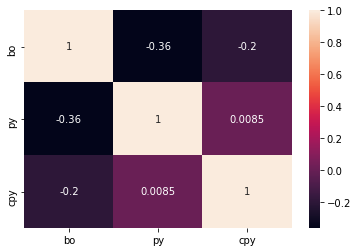

In [201]:
sn.heatmap(corrMatrix, annot=True)

# Scatter

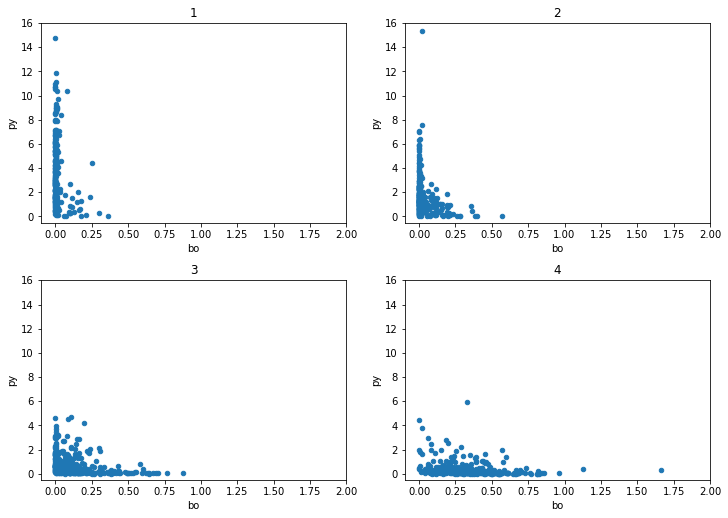

In [204]:
cols = 2
UGs = DH.groupby('ug').groups.keys()
rows = int(len(DH.groupby('ug').groups.keys())/cols) + 1
fig, axes = plt.subplots(rows, cols, constrained_layout=True, figsize=(10,10))
for index, ug in enumerate(UGs):
    DH.groupby('ug').get_group(ug).plot.scatter(x='bo', y='py', title=str(ug), ax=axes[int(index/cols), index%cols])
    axes[int(index/cols), index%cols].set_xlim((-0.1, 2.0))
    axes[int(index/cols), index%cols].set_ylim((-0.5, 16.0))

for index in range(cols*rows):
    if (index + 1) > len(UGs):
        fig.delaxes(axes[int(index/cols), index%cols])

plt.savefig('scatter_by_ug.png')

# Media Condicional

In [208]:
step = 120.0
DH['Step_East'] = step*(DH['East']/step).astype(int) + step/2.0
DH

,East,North,Elevation,bo,cpy,py,alte,mine,dom,ug,Step_East
0,156911.7393,93193.44188,3827.13,0.000,0.564,1.199,BTK,CPY,3,3,156900.0
1,156908.3362,93214.70964,3768.98,0.019,0.671,3.247,BTK,CPY,3,3,156900.0
2,156905.6440,93233.72129,3712.19,0.097,0.582,1.035,BTK,BN,3,4,156900.0
3,156903.2416,93252.82611,3653.51,0.193,0.487,0.780,BTK,CPY,3,3,156900.0
4,156901.0979,93270.77183,3598.07,0.058,1.036,2.730,BTK,CPY,3,3,156900.0
...,...,...,...,...,...,...,...,...,...,...,...
1270,156988.2447,92051.49218,2849.81,0.039,0.947,0.063,BTK,CPY,3,3,157020.0
1271,157005.5199,92071.95481,2753.56,0.001,1.000,0.272,BTK,CPY,3,3,157020.0
1272,156214.7871,91746.89044,3249.31,0.019,0.740,7.601,SCL,CPY,3,2,156180.0
1273,156214.4738,91738.09338,3047.85,0.001,1.139,7.086,ANH,CPY,3,2,156180.0


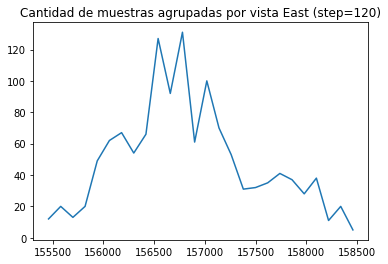

In [209]:
x = DH.groupby('Step_East').groups.keys()
y = DH.groupby('Step_East').describe()['East']['count'].values
plt.plot(list(x), y)
plt.title('Cantidad de muestras agrupadas por vista East (step=120)')
plt.savefig('Step_East.png')

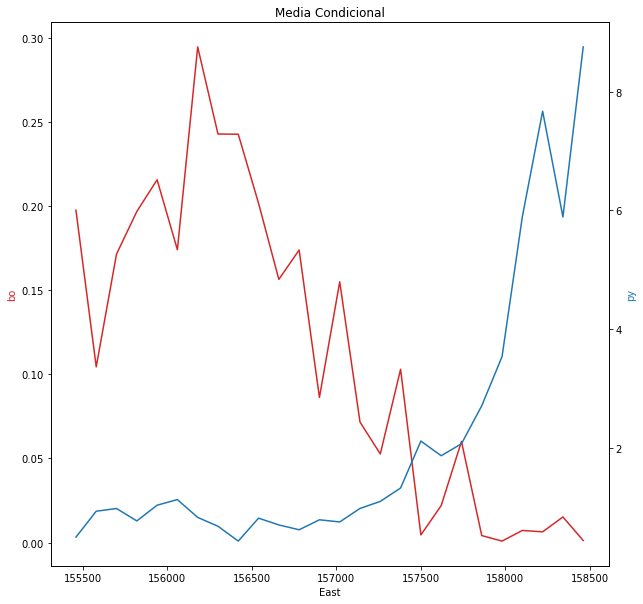

In [210]:
groupby = DH.groupby('Step_East')
fig, ax1 = plt.subplots(figsize=(10,10))
ax1.set_xlabel('East')
ax1.plot(list(groupby.groups.keys()), groupby.describe()['bo']['mean'], color='tab:red')
ax1.set_ylabel('bo', color='tab:red')
ax2 = ax1.twinx()
ax2.plot(list(groupby.groups.keys()), groupby.describe()['py']['mean'],color='tab:blue')
ax2.set_ylabel('py', color='tab:blue')
plt.title('Media Condicional')
plt.savefig('East.png')

In [211]:
continuous = 'bo'
fig = px.scatter_3d(DH, x='East', y='North', z='Elevation', color=continuous, color_continuous_scale=px.colors.sequential.Jet, range_color=[0.0, DH[continuous].quantile(0.95)])
fig.update_traces(marker=dict(size=5.0))
fig.show()
continuous = 'py'
fig = px.scatter_3d(DH, x='East', y='North', z='Elevation', color=continuous, color_continuous_scale=px.colors.sequential.Jet, range_color=[0.0, DH[continuous].quantile(0.95)])
fig.update_traces(marker=dict(size=5.0))
fig.show()

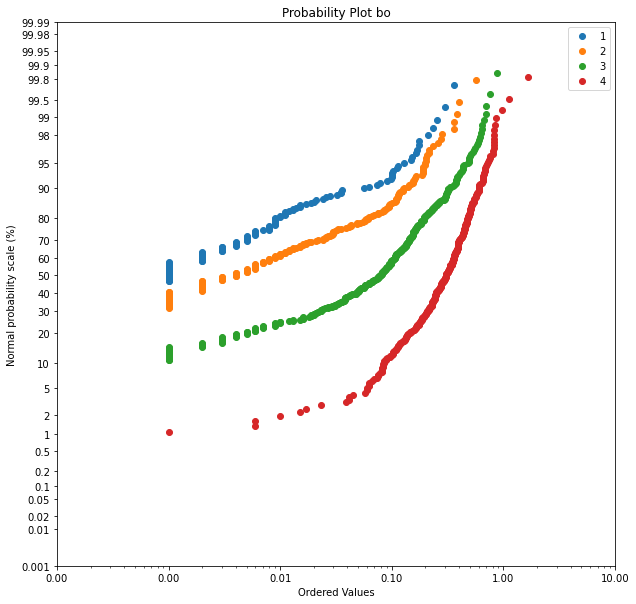

In [217]:
from matplotlib.ticker import ScalarFormatter
fig, ax = plt.subplots(figsize=(10,10))
for category in DH.groupby('ug').groups.keys():
    xData = DH.groupby('ug').get_group(category)['bo'].sort_values()
    probscale.probplot(xData, ax=ax, probax='y', datascale='log', label=category)
ax.legend()
ax.set_ylim(bottom=0.001,top=99.99)
ax.set_xlim(left=1e-4, right=1.0e1)
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
ax.set_xlabel('Ordered Values')
ax.set_ylabel('Normal probability scale (%)')
ax.set_title('Probability Plot bo')
plt.savefig('probPlot_bo_by_ug.png')

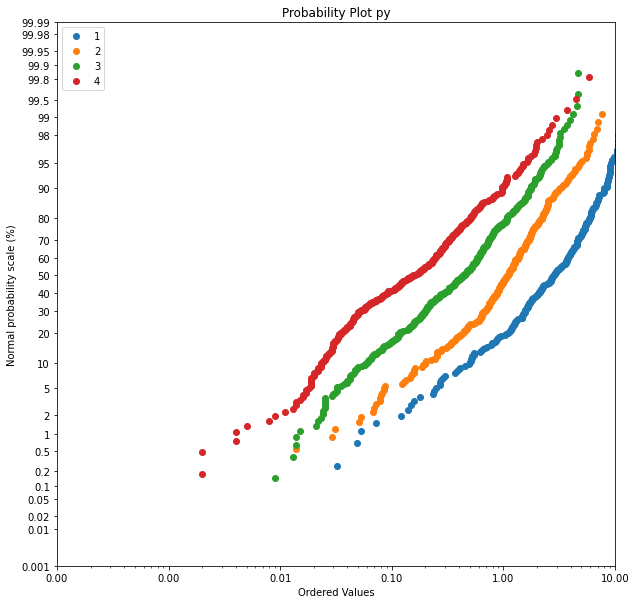

In [218]:
from matplotlib.ticker import ScalarFormatter
fig, ax = plt.subplots(figsize=(10,10))
for category in DH.groupby('ug').groups.keys():
    xData = DH.groupby('ug').get_group(category)['py'].sort_values()
    probscale.probplot(xData, ax=ax, probax='y', datascale='log', label=category)
ax.legend()
ax.set_ylim(bottom=0.001,top=99.99)
ax.set_xlim(left=1e-4, right=1.0e1)
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
ax.set_xlabel('Ordered Values')
ax.set_ylabel('Normal probability scale (%)')
ax.set_title('Probability Plot py')
plt.savefig('probPlot_py_by_ug.png')

In [221]:
DH.to_csv('output_mod6.csv', index=False)